# Scipy
疎行列を表す型はscipy.sparseの下にある。

### Table of Contents
- basics 
 - lil_matrix
 - csr_matrix
 - csc_matrix
- stats
 - norm.pdf
 - norm.cdf

### 疎行列を扱う際の一般的な流れ
疎行列による計算を実施する際、lil_matrix型の変数を用意して、  
csr_matrix型またはcsc_matrix型に変換してから計算することを推奨する。  
lil_matrix型でも計算はできるが、計算速度の面では劣ることが多い。  
一方で、csr_matrixとcsc_matrixは行列の要素に逐次値を設定することができないため、値の設定にはlil_matrixの方が便利。  
つまり、以下のフローである。
1. lil_matrix型の変数を用意して、各要素に値を設定する。
1. 設定されたlil_matrixをcsr_matrixまたはcsc_matrixに変換する。
1. 変換された疎行列について計算をする。

### 疎行列の基礎：lil_matrix型

In [1]:
from scipy import sparse

In [2]:
# lil_matrix型の疎行列を作成
# 全要素が0の疎行列。
# (row, column)を指定する。
a = sparse.lil_matrix((4, 5))
print(type(a))
a

<class 'scipy.sparse.lil.lil_matrix'>


<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in LInked List format>

In [3]:
# 通常の行列に変換: .toarray()
a.toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [4]:
# 疎行列に要素を追記していく感じ。
# []のスライスみたいな形で追記箇所を指定。[row, column]
a[0, 1] = 1
a[0, 3] = 2
a[2, 2] = 3
a[3, 4] = 4

a.toarray()

array([[0., 1., 0., 2., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 4.]])

In [5]:
b = sparse.lil_matrix((5, 4))

b[0, 2] = 1
b[1, 2] = 2
b[2, 3] = 3
b[3, 3] = 4

b.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 3.],
       [0., 0., 0., 4.],
       [0., 0., 0., 0.]])

In [6]:
# 行列積の計算
c = a.dot(b)

c.toarray()

array([[0., 0., 2., 8.],
       [0., 0., 0., 0.],
       [0., 0., 0., 9.],
       [0., 0., 0., 0.]])

### 疎行列による計算
csr_matrix: 行を取り出す操作が高速。  
csc_matrix: 列を取り出す操作が高速。

In [7]:
# csr_matrix型に変換
a1 = a.tocsr()
b1 = b.tocsr()
c1 = a1.dot(b1)

c1.toarray()

array([[0., 0., 2., 8.],
       [0., 0., 0., 0.],
       [0., 0., 0., 9.],
       [0., 0., 0., 0.]])

In [8]:
# 行を取り出す。： .getrow()
print(a1.toarray())
b1 = a1.getrow(1)
b1.toarray()

[[0. 1. 0. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 4.]]


array([[0., 0., 0., 0., 0.]])

In [9]:
# csc_matrix型に変換
a2 = a.tocsc()
b2 = b.tocsc()
c2 = a2.dot(b2)

c2.toarray()

array([[0., 0., 2., 8.],
       [0., 0., 0., 0.],
       [0., 0., 0., 9.],
       [0., 0., 0., 0.]])

In [10]:
# 列を取り出す。： .getcol()
print(a1.toarray())
b2 = a2.getcol(3)
b2.toarray()

[[0. 1. 0. 2. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 4.]]


array([[2.],
       [0.],
       [0.],
       [0.]])

In [11]:
# 転置
b2.T.toarray()

array([[2., 0., 0., 0.]])

In [12]:
# 転置すると型が変わる。csc→csr, csr→csc
type(b2.T)

scipy.sparse.csr.csr_matrix

### stats

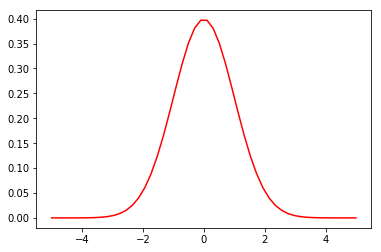

In [3]:
# 正規分布の確率密度関数を計算する関数
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-5, 5)
y = norm.pdf(x)  #デフォルトはμ=0, σ=1として計算する。
plt.plot(x, y, color="r")
plt.show()

In [5]:
# 累積分布関数：cdf
# 正規分布に従う事象Ｘが-1 < X < 1の範囲に入る確率を計算する方法
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859

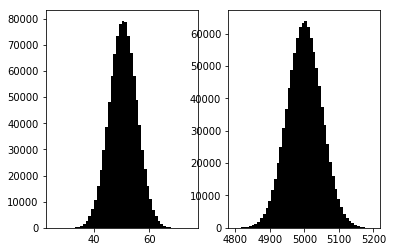

In [4]:
def cointoss(n, m):  # n個のコインを投げることをm回繰り返し、結果をリストで返す
    l = []
    for _ in range(m):
        r = np.random.randint(2, size=n)
        l.append(r.sum())
    return l


np.random.seed(0)
fig, axes = plt.subplots(1, 2)

l = cointoss(100, 1000000)
axes[0].hist(l, range=(25, 75), bins=50, color="k")
l = cointoss(10000, 1000000)
axes[1].hist(l, range=(4800, 5200), bins=50, color="k")
plt.show()